In [1]:
import sys
sys.path.append("../../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.datasets import load_spam
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold

from ml.model.metrics import Metrics

# Dataset spam
<b><span style="color:blue"> 1 spam
0 not spam </span> </b>

<b> Positivo: É spam</b>

- VP = documentos que são de fato spam e o modelo afirma que eram spam
- VN = documentos que não são spam e o modelo classifica como não spam
- FN =  documentos que são realmente spam, mas o modelo o rotula como não spam
- FP = documentos que não são spam e o modelo informa que é spam


Info: https://www.scikit-yb.org/en/latest/api/datasets/spam.html

In [3]:
X, y = load_spam()

In [4]:
y.value_counts()

0    2788
1    1812
Name: is_spam, dtype: int64

In [5]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


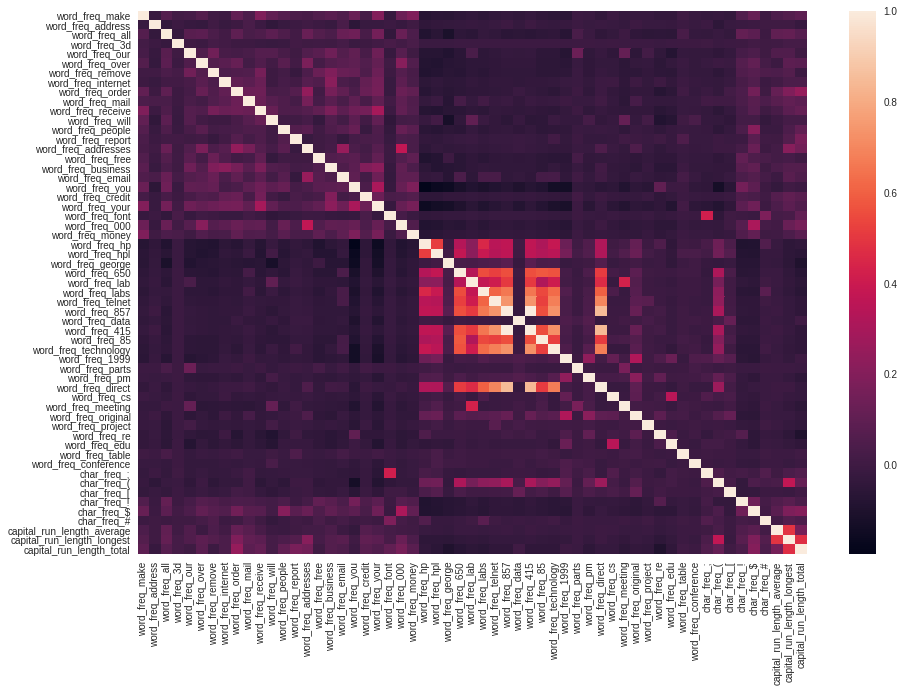

In [6]:
fig, ax = plt.subplots(figsize=(15,10))  
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

# Split train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model

In [8]:
model = LogisticRegression(multi_class="auto", solver="liblinear", random_state=123)

In [9]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

## Metricas

In [11]:
Metrics.classification(y_test, y_pred, y_prob)

{'accuracy': 0.9130434782608695,
 'f1': 0.8930307941653159,
 'precision': 0.9168053244592346,
 'recall': 0.8704581358609794,
 'roc_auc': 0.9655447559375585}

# Evaluate Model

## Quais foram as métricas gerais do modelo?

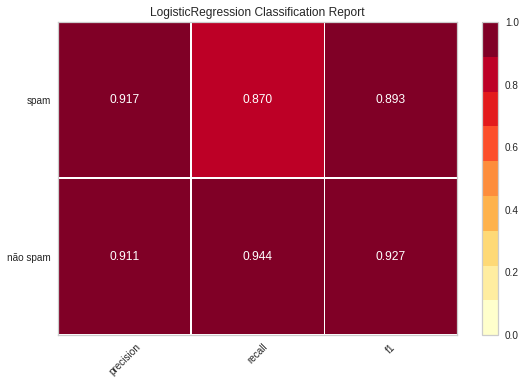

In [24]:
viz = ClassificationReport(model, classes=["não spam","spam"])
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## E a matriz de confusão?

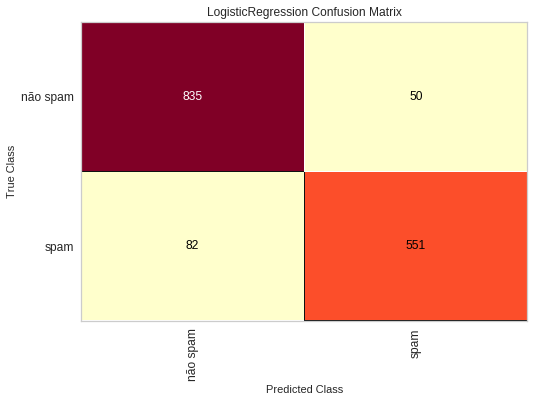

In [13]:
viz = ConfusionMatrix(model, classes=["não spam","spam"])
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## Outra forma de visualizar os erros

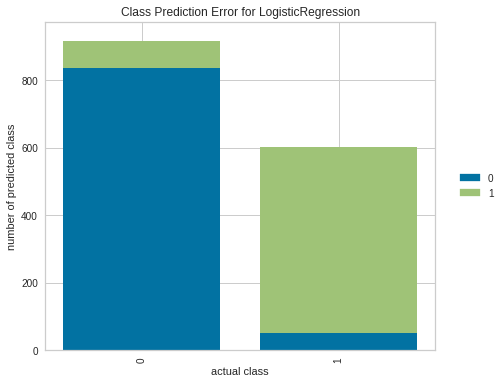

In [14]:
visualizer = ClassPredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## E a curva ROC?

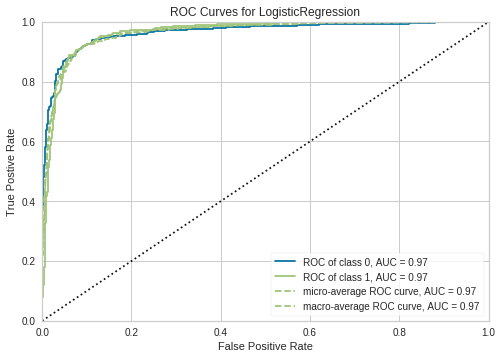

In [15]:
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()      

## Qual é o melhor threshold?

- VP = documentos que são de fato spam e o modelo afirma que eram spam
- VN = documentos que não são spam e o modelo classifica como não spam
- FN = documentos que são realmente spam, mas o modelo o rotula como não spam
- FP = documentos que não são spam e o modelo informa que é spam


- <b> Precisão: </b> daqueles que classifiquei como positivos, ou seja como spams, quantos efetivamente eram? 
- <b> Recall: </b> daqueles que são spams, quantos eu recuperei?

O que é pior? 

- classificar documentos que são spam como não spam (FP)
- classificar documentos que não são spam como spam (FN)

O quero diminuir? Os FP ou FN?

- Aqui, vou falar que é pior classificar documentos que não são spam como spam, porque com essa classificação posso perder algum email importante. Então quero diminuir os meus FN. Para isso preciso aumentar meu Recall.

Mas por que aumentar meu recall?

- Observe a fórmula do recall:

$Recall=\frac{VP}{VP+FN}$

Se diminuir o FN aumento meu Recall

In [18]:
DiscriminationThreshold?

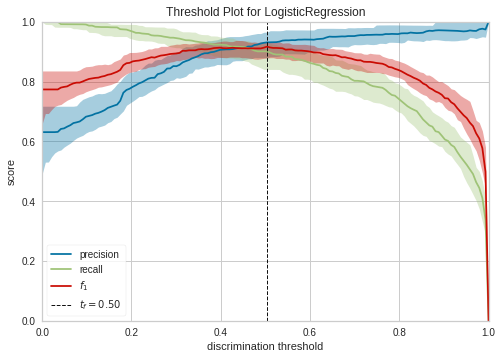

In [19]:
visualizer = DiscriminationThreshold(model, exclude="queue_rate")

visualizer.fit(X_train, y_train)
visualizer.show()  

### quero pesar a minha precisão. Então vou passar um valor < 1 para o fbeta

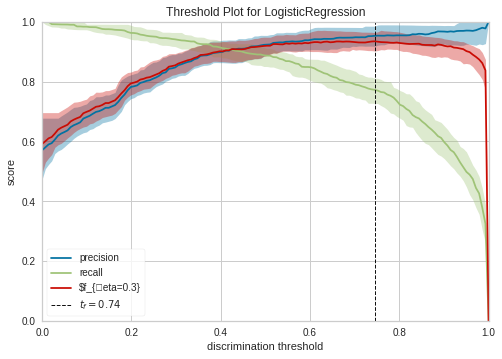

In [21]:
visualizer = DiscriminationThreshold(model, fbeta=0.3, exclude="queue_rate")

visualizer.fit(X_train, y_train)
visualizer.show()  

### Quero recuperar a maior quantidade possível, aumentar meu recall

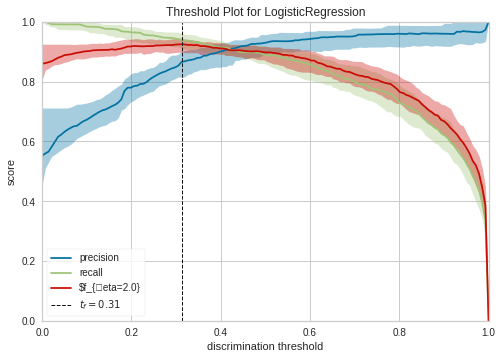

In [23]:
visualizer = DiscriminationThreshold(model, fbeta=2, exclude="queue_rate")

visualizer.fit(X_train, y_train)
visualizer.show()  